## Superposition of energy eigenstates

Questions? kasper.peeters@durham.ac.uk

This notebook shows the time-evolution of the sum of two energy eigenstates
for a particle in a box (in 1 dimension). This corresponds to problem 3 of
chapter 12 of the Durham University Mathematical Physics II lecture notes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

The normalised energy eigenfunctions for a particle in a box of unit size are
$$\phi_n(x) = \sqrt{2}\sin(n\pi x)$$
and (setting $\hbar=1$) the energy eigenvalues are
$$ E_n = \frac{1}{2} n^2 \pi^2\,.$$

In [2]:
def phi(n, x):
    return np.sqrt(2)*np.sin(n*np.pi*x)

def E(n):
    return n**2*np.pi**2/2

Let's plot the first three for reference:

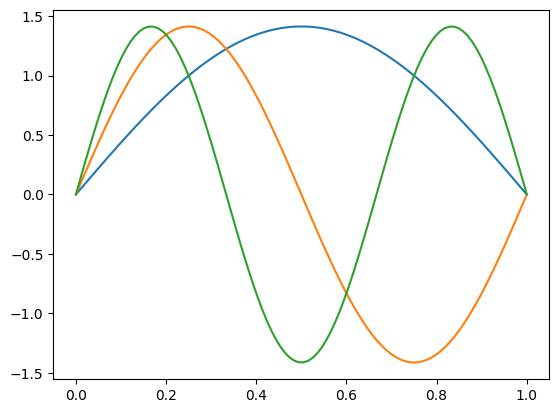

In [3]:
x = np.linspace(0,1,100)
plt.plot(x, phi(1,x), x,phi(2,x), x, phi(3,x),'-')

We will look at a wave function which is a superposition of the 1st and 2nd 
energy eigenstates,
$$ \psi(x) = \frac{1}{\sqrt{2}} \Big(
\phi_1(x) + \phi_2(x) \Big)\,.$$
The time-evolution can be found by multiplying each term with its own
$\exp(-iE t)$ factor, for the appropriate $E$. The probability density is also
defined below, by taking the complex norm squared.

In [4]:
def psi(x,t):
    return 1/np.sqrt(2)*(np.exp(-1j*E(1)*t)*phi(1,x) + np.exp(-1j*E(2)*t)*phi(2,x))

def P(x,t):
    return np.real_if_close(psi(x,t)*np.conj(psi(x,t)))

For $t=0$ and $t=1$ the probability density looks as follows:

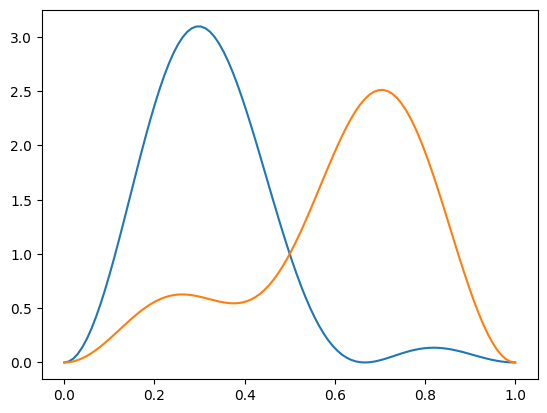

In [5]:
plt.plot(x, P(x,0), x, P(x,1),'-')

Let's make a movie. The block below sets up a figure environment with
appropriate axes ranges $0\leq x\leq 1$ and $0\leq y \leq 3$.

In [6]:
%%capture
fig, ax = plt.subplots();
ax.set_xlim(( 0, 1))
ax.set_ylim(( 0, 3))
ourplot, = ax.plot([], [])

To animate, we need to define a function which returns the `ourplot` figure
for a given time $t$. It actually receives the frame number $i$, and we will
set $t=i/50.0/f$ where $f$ is the frequency. So that at $i=50$, we have
$t=T$ with $T$ the period of oscillation.

In [7]:
fpp  = 50         # number of animation frames per period
w    = E(2)-E(1)  # angular frequency, see the problem in the notes
freq = w/2/np.pi  # frequency

def animate(i):
    xv = np.linspace(0, 3, 200)
    yv = P(xv, i/fpp/freq)
    ourplot.set_data(xv, yv)
    return (ourplot,)

In [8]:
freq

2.356194490192345

The plot is then made by constructing a `FuncAnimation` object, giving it 
the canvas object `fig` in which to draw, the function `animate` which returns
the figure for a given frame, the number of frames, and the delay/interval (in ms) between
each frame.

In [9]:
anim = animation.FuncAnimation(fig, animate, frames=fpp, interval=50)

In [10]:
HTML(anim.to_jshtml())

Note how you can easily see that the expectation value of the position oscillates
with frequency $\omega/(2\pi)$ (the duration of one run of the animation),
where $\omega = E_2 - E_1$, as computed in the problem.